In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Description

In [2]:
# pH of water  (for drinkable water should be between 6,5 and 9,5)
# Hardness - Capacity of water to precipitate soap in mg/L  (for drinkable water max is 500)
# Solids - Total dissolved solids in ppm (for drinkable water max is 500ppm)
# Chloramines - Amount of Chloramines in ppm (for drinkable water max is 4ppm)
# Sulfate - Amount of Sulfates dissolved in mg/L (for drinkable water max is 250)
# Conductivity - Electrical conductivity of water in μS/cm (for drinkable water max is 2500)
# Organic_carbon - Amount of organic carbon in ppm (for drinkable water max 10ppm)
# Trihalomethanes - Amount of Trihalomethanes in μg/L (max 100)
# Turbidity - Measure of light emiting property of water in NTU (Nephelometric Turbidity Units) (max 1NTU)
# Potability - indicates if water is safe for human consumption (1 - drinkable, 0 - not drinkable)

# Importing The Dataset

In [3]:
df=pd.read_csv('waterpotability.csv')

In [4]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3267.000000,3267.000000,3267.000000,2495.000000,3267.000000,3267.000000,3114.000000,3267.000000,3267.000000
mean,7.080795,196.366063,22013.423893,7.123074,333.775777,426.144283,14.288057,66.396293,3.966987,0.396388
std,1.594320,32.893960,8760.888319,1.583597,41.416840,80.787862,3.308664,16.175008,0.780835,0.489222
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.847379,15665.106976,6.128488,307.699498,365.729707,12.066072,55.844536,3.439682,0.000000
50%,7.036752,196.952875,20965.478309,7.130437,333.073546,421.879854,14.221757,66.622485,3.955154,0.000000
75%,8.062066,216.660337,27334.162293,8.115043,359.950170,481.609194,16.559152,77.337473,4.500432,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3267 non-null   float64
 2   Solids           3267 non-null   float64
 3   Chloramines      3267 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3267 non-null   float64
 6   Organic_carbon   3267 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3267 non-null   float64
 9   Potability       3267 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.4 KB


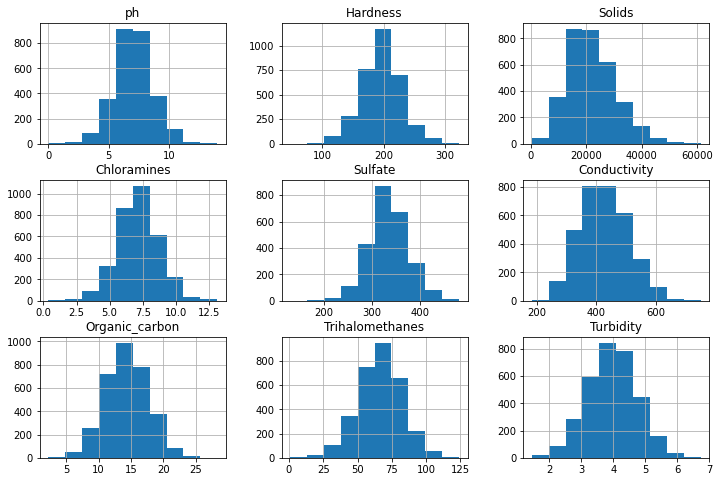

In [7]:
df.drop('Potability', axis=1).hist(figsize=(12,8))
plt.show()

In [8]:
cor=df.drop('Potability',axis=1).corr()
cor

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.047814,-0.030674,-0.106923,-0.023414,0.004719,-0.013013,-0.015414
Solids,-0.089288,-0.047814,1.000000,-0.072385,-0.171804,0.013918,0.009512,-0.009143,0.018824
Chloramines,-0.034350,-0.030674,-0.072385,1.000000,0.027244,-0.019203,-0.013751,0.017084,0.002106
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023414,0.013918,-0.019203,-0.016121,1.000000,0.021542,0.001285,0.004976
Organic_carbon,0.043503,0.004719,0.009512,-0.013751,0.030831,0.021542,1.000000,-0.013274,-0.026861
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.015414,0.018824,0.002106,-0.011187,0.004976,-0.026861,-0.022145,1.000000


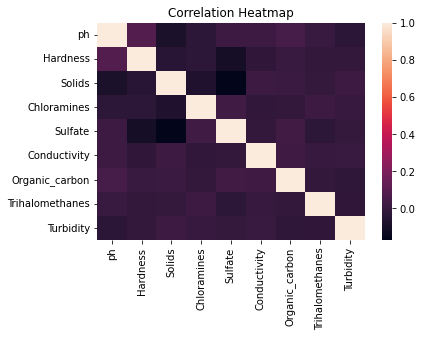

In [9]:
fig = sns.heatmap(cor)

fig.set_title('Correlation Heatmap')
plt.show()

#### As we can see, there seems to be very less correlation between all the features.

# Visualisations of meansures with null values

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


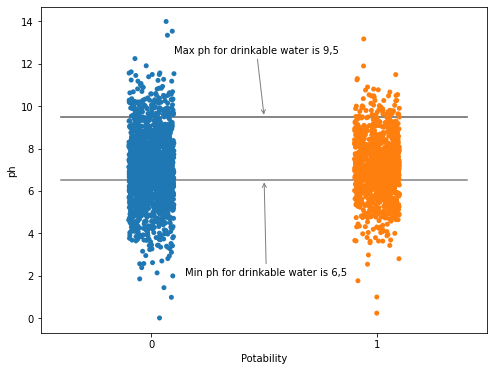

In [11]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x='Potability', y='ph', data=df)
a = [-0.4,1.4]
b = [9.5,9.5]
sns.lineplot(a,b, color='gray')
c = [-0.4,1.4]
d = [6.5,6.5]
sns.lineplot(a,b, color='gray')
xx=sns.lineplot(c,d, color='gray')
ax.annotate('Max ph for drinkable water is 9,5', xy=[0.5,9.5], 
           xytext=[0.1,12.5],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
xx.annotate('Min ph for drinkable water is 6,5', xy=[0.5,6.5], 
           xytext=[0.15,2],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


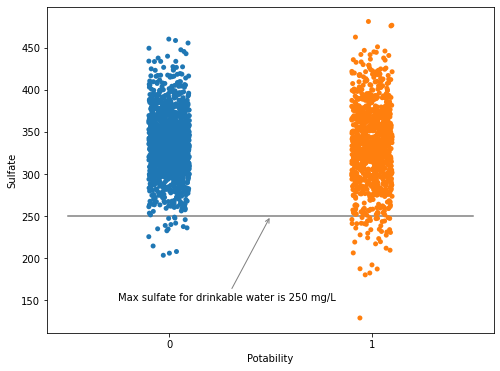

In [12]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x='Potability', y='Sulfate', data=df)
a = [-0.5,1.5]
b = [250,250]
sns.lineplot(a,b, color='gray')
ax.annotate('Max sulfate for drinkable water is 250 mg/L', xy=[0.5,250], 
           xytext=[-0.25,150],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


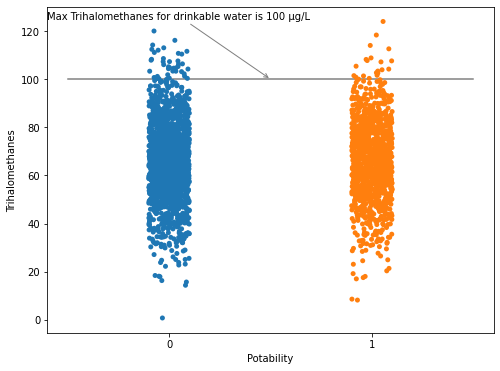

In [13]:
plt.figure(figsize=(8,6))
ax = sns.stripplot(x='Potability', y='Trihalomethanes', data=df)
a = [-0.5,1.5]
b = [100,100]
sns.lineplot(a,b, color='gray')
ax.annotate('Max Trihalomethanes for drinkable water is 100 μg/L', xy=[0.5,100], 
           xytext=[-0.6,125],
           arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.show()

# Data Preparation - dealing with missing values

In [10]:
class0=df[df['Potability']==0]
class0.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1666.000000,1972.000000,1972.000000,1972.000000,1496.000000,1972.000000,1972.000000,1873.000000,1972.000000,1972.0
mean,7.065088,196.666961,21784.258743,7.138191,334.573923,426.729451,14.367967,66.494113,3.968688,0.0
std,1.686784,31.060029,8516.488947,1.447627,36.546200,80.039288,3.348760,16.250336,0.782188,0.0
min,0.000000,98.452931,320.942611,2.562255,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.008367,177.799573,15715.740730,6.193384,311.318216,368.450634,12.091922,55.816510,3.444706,0.0
50%,6.992004,197.039446,20838.587290,7.105432,333.389426,422.145751,14.293508,66.659352,3.954840,0.0
75%,8.135558,216.016872,27011.592306,8.075655,356.769499,481.151513,16.665328,77.382841,4.501133,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [11]:
class1=df[df['Potability']==1]
class1.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1119.000000,1295.000000,1295.000000,1295.000000,999.000000,1295.000000,1295.000000,1241.000000,1295.000000,1295.0
mean,7.104179,195.907862,22362.391981,7.100053,332.580554,425.253200,14.166372,66.248657,3.964396,1.0
std,1.446165,35.512683,9112.756940,1.771052,47.786216,81.937682,3.244159,16.066057,0.779065,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.229919,174.380497,15638.128264,6.031752,300.991432,360.945241,12.052522,55.876641,3.428401,1.0
50%,7.071314,196.791251,21190.154943,7.166639,331.838167,420.830866,14.168314,66.608891,3.957012,1.0
75%,7.967691,218.185080,27968.799685,8.182988,365.951302,483.380949,16.352385,77.286551,4.498377,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [12]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   6.992004
Sulfate            333.389426
Trihalomethanes     66.659352
dtype: float64

In [13]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.071314
Sulfate            331.838167
Trihalomethanes     66.608891
dtype: float64

#### We can see that the difference between the min, max, mean and median values of Potable and Non-Potable Water is minimal. So we use the overall median of the feature to impute the values

In [14]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [15]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Standardizing The Data

In [16]:
# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
dfs=df[:]

In [17]:
X = dfs.drop('Potability',axis=1)
y = dfs['Potability']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[ 0.5334172 ,  0.07439224, -0.18176156, ...,  0.65520782,
         0.01811387,  0.45656846],
       [ 0.64052317, -0.81992826, -0.32775598, ...,  0.25865315,
         0.10576128, -0.27640969],
       [-1.59000645,  1.67739712,  0.09499178, ...,  0.68006443,
         0.02483385, -0.04687397],
       ...,
       [ 0.00589606, -0.12579489,  0.40549248, ...,  0.06304028,
        -0.14038049,  0.04825213],
       [ 0.46175963, -0.69036951, -0.74536395, ..., -0.94829111,
         1.34153737, -0.88269954],
       [ 0.05829301,  0.4949176 ,  1.23919555, ..., -0.4882365 ,
        -0.51292191,  1.31896164]])

# Modelling - spot checking

In [22]:
# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [27]:
models =[("LR", LogisticRegression(random_state=42)),("SVC", SVC(random_state=42)),("KNN",KNeighborsClassifier()), 
         ("XGB", XGBClassifier(random_state=42)), ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()), 
         ("Ridge", RidgeClassifier(random_state=42)), ('RF',RandomForestClassifier(random_state=42)),
         ('ADA',AdaBoostClassifier(random_state=42)), ("GB",GradientBoostingClassifier(random_state=42))]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
finalResults

[('LR', 0.6457055214723926),
 ('GB', 0.6374235661214267),
 ('RF', 0.6367298886614527),
 ('Ridge', 0.6125),
 ('GNB', 0.596291800774644),
 ('XGB', 0.5849675425639431),
 ('ADA', 0.5586032741205156),
 ('DTC', 0.5564227424864566),
 ('KNN', 0.5218347135661231),
 ('SVC', 0.3119266055045872)]

#### I chose the top 3 baseline models and performed Hyperparameter tuning to it.

# Hyperparameter Tuning

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

### Random Forrest parameters tuning

In [43]:
rf = RandomForestClassifier()
param_gridRF = {'n_estimators':[10,50,100,200], 'max_features':['auto','sqrt','log2'], 
                'max_depth':list(range(1,11)), 'random_state': [42]}

In [44]:
grid_rf = GridSearchCV(rf, param_gridRF, cv=10)
grid_rf.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200],
                         'random_state': [42]})

In [45]:
print('Best parameters: {}'.format(grid_rf.best_params_))
print('Best score: {}'.format(grid_rf.best_score_))

Best parameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200, 'random_state': 42}
Best score: 0.663613728644756


In [46]:
rf9 = RandomForestClassifier(max_depth=9, random_state=42)  # default: 'max_features': 'sqrt', 'n_estimators': 100
rf9.fit(X_train, y_train)
rf9_results = rf9.predict(X_test)
score_rf9 = precision_score(y_test, rf9_results)
score_rf9

0.6470588235294118

In [47]:
y_pred1 = rf9.predict(X_test)
confusion_matrix(y_pred1, y_test)

array([[564, 281],
       [ 48,  88]], dtype=int64)

In [48]:
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       0.92      0.67      0.77       845
           1       0.24      0.65      0.35       136

    accuracy                           0.66       981
   macro avg       0.58      0.66      0.56       981
weighted avg       0.83      0.66      0.72       981



### GB parameters tuning

In [49]:
param_gridGB ={ 'learning_rate':[0.001,0.01,0.1,1],
            'n_estimators':[100,200,500,1000], 'random_state': [42]}
print("GB Parameters:\n{}".format(param_gridGB))

GB Parameters:
{'learning_rate': [0.001, 0.01, 0.1, 1], 'n_estimators': [100, 200, 500, 1000], 'random_state': [42]}


In [50]:
gb=GradientBoostingClassifier()
clf_GB = GridSearchCV(gb, param_gridGB, cv=5)
clf_GB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 500, 1000],
                         'random_state': [42]})

In [52]:
print('Best parameters: {}'.format(clf_GB.best_params_))
print('Best score: {}'.format(clf_GB.best_score_))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 42}
Best score: 0.6478619819785386


In [54]:
gbT = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500, random_state=42)
gbT.fit(X_train, y_train)
gbT_results = gbT.predict(X_test)
score_gbT = precision_score(y_test, gbT_results)
score_gbT

0.6124031007751938

In [55]:
y_pred2 = gbT.predict(X_test)
confusion_matrix(y_pred2, y_test)

array([[562, 290],
       [ 50,  79]], dtype=int64)

In [56]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       852
           1       0.21      0.61      0.32       129

    accuracy                           0.65       981
   macro avg       0.57      0.64      0.54       981
weighted avg       0.83      0.65      0.71       981



### Logistic Regression parameters tuning

In [58]:
param_gridLR ={ 'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2', 'elasticnet'], 
               'max_iter': [100, 500, 1000], 'random_state':[42]}
print("LR Parameters:\n{}".format(param_gridLR))

LR Parameters:
{'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2', 'elasticnet'], 'max_iter': [100, 500, 1000], 'random_state': [42]}


In [59]:
lr = LogisticRegression()
clf_LR = GridSearchCV(lr, param_gridLR, cv=10)
clf_LR.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [42]})

In [60]:
print('Best parameters: {}'.format(clf_LR.best_params_))
print('Best score: {}'.format(clf_LR.best_score_))

Best parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'random_state': 42}
Best score: 0.5953669654485559


In [61]:
lrT = LogisticRegression(C=0.01)  # default 'max_iter': 100, 'penalty': 'l2'
lrT.fit(X_train, y_train)
lrT_results = lrT.predict(X_test)
score_lrT = precision_score(y_test, lrT_results)
score_lrT

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [62]:
y_pred3 = lrT.predict(X_test)
confusion_matrix(y_pred3, y_test)

array([[612, 369],
       [  0,   0]], dtype=int64)

In [63]:
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77       981
           1       0.00      0.00      0.00         0

    accuracy                           0.62       981
   macro avg       0.50      0.31      0.38       981
weighted avg       1.00      0.62      0.77       981



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusions:

### The characteristics of the water on which the model was based did not allow to achieve good results:

###  1. All the characterics of potable water and non potable were almost the same, eg. mean, min, max

###  2. Only 2,7% of the water samples were safe in terms of Chloramines levels.

###  3. Only 2.3% of the water samples were safe in terms of Sulfate levels.

###  4. 100% of the water samples weren't safe for drinking in terms of the Turbidity of water samples.

###  5. The correlation coefficients between the features were very low.

###  6. Random Forest and GBClassifier worked the best to train the model.